In [236]:
import glob

import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt
import pandas as pd

# from bts_phot import calibrate_fps

plt.rc('xtick', top=True, direction='in', labelsize=12)
plt.rc('ytick', right=True, direction='in', labelsize=12)
# plt.rc('font', family='Arial')

In [333]:
# READING IN THE FORCED PHOTOMETRY DATA
cols = ['index', 'field', 'ccdid', 'qid', 'filter', 'pid', 'infobitssci', 'sciinpseeing', 'scibckgnd', 'scisigpix', 'zpmaginpsci', 'zpmaginpsciunc', 'zpmaginpscirms', 'clrcoeff', 'clrcoeffunc', 'ncalmatches', 'exptime', 'adpctdif1', 'adpctdif2', 'diffmaglim', 'zpdiff', 'programid', 'jd', 'rfid', 'forcediffimflux', 'forcediffimfluxunc', 'forcediffimsnr', 'forcediffimchisq', 'forcediffimfluxap', 'forcediffimfluxuncap', 'forcediffimsnrap', 'aperturecorr', 'dnearestrefsrc', 'nearestrefmag', 'nearestrefmagunc', 'nearestrefchi', 'nearestrefsharp', 'refjdstart', 'refjdend', 'procstatus']
snztf18 = pd.read_csv('./forced_phot_data/ZTF18aalrxas_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)
sn19rwd = pd.read_csv('./forced_phot_data/19rwd_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)
sn20bio = pd.read_csv('./forced_phot_data/20bio_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)
sn21aezx = pd.read_csv('./forced_phot_data/21aezx_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)
sn21gno = pd.read_csv('./forced_phot_data/21gno_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)
sn21heh = pd.read_csv('./forced_phot_data/21heh_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)
sn21vgn = pd.read_csv('./forced_phot_data/21vgn_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)
sn22hnt = pd.read_csv('./forced_phot_data/22hnt_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)
sn22jpx = pd.read_csv('./forced_phot_data/22jpx_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)
sn22qzr = pd.read_csv('./forced_phot_data/22qzr_fp_lc.txt', names=cols, header=None, sep=" ", skiprows=57)

snztf18.columns

Index(['index', 'field', 'ccdid', 'qid', 'filter', 'pid', 'infobitssci',
       'sciinpseeing', 'scibckgnd', 'scisigpix', 'zpmaginpsci',
       'zpmaginpsciunc', 'zpmaginpscirms', 'clrcoeff', 'clrcoeffunc',
       'ncalmatches', 'exptime', 'adpctdif1', 'adpctdif2', 'diffmaglim',
       'zpdiff', 'programid', 'jd', 'rfid', 'forcediffimflux',
       'forcediffimfluxunc', 'forcediffimsnr', 'forcediffimchisq',
       'forcediffimfluxap', 'forcediffimfluxuncap', 'forcediffimsnrap',
       'aperturecorr', 'dnearestrefsrc', 'nearestrefmag', 'nearestrefmagunc',
       'nearestrefchi', 'nearestrefsharp', 'refjdstart', 'refjdend',
       'procstatus'],
      dtype='object')

In [334]:
#READING IN THE ALERCE ALERT DATA

#DETECTIONS
sn19rwd_a = pd.read_csv('./19rwd/detections.csv')
sn21gno_a = pd.read_csv('./21gno/detections.csv')
sn21heh_a = pd.read_csv('./21heh/detections.csv')
sn21vgn_a = pd.read_csv('./21vgn/detections.csv')
sn22hnt_a = pd.read_csv('./22hnt/detections.csv')
sn22jpx_a = pd.read_csv('./22jpx/detections.csv')

print(sn19rwd_a.columns)

#NON DETECTIONS 
sn19rwd_non = pd.read_csv('./19rwd/non_detections.csv')
sn21gno_non = pd.read_csv('./21gno/non_detections.csv')
sn21heh_non = pd.read_csv('./21heh/non_detections.csv')
sn21vgn_non = pd.read_csv('./21vgn/non_detections.csv')
sn22hnt_non = pd.read_csv('./22hnt/non_detections.csv')
sn22jpx_non = pd.read_csv('./22jpx/non_detections.csv')

print(sn21vgn_non.columns)

Index(['tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'distnr', 'magpsf', 'magpsf_corr', 'magpsf_corr_ext', 'magap',
       'magap_corr', 'sigmapsf', 'sigmapsf_corr', 'sigmapsf_corr_ext',
       'sigmagap', 'sigmagap_corr', 'ra', 'dec', 'rb', 'rbversion', 'drb',
       'magapbig', 'sigmagapbig', 'rfid', 'has_stamp', 'corrected', 'dubious',
       'candid_alert', 'step_id_corr', 'phase', 'parent_candid'],
      dtype='object')
Index(['tid', 'mjd', 'fid', 'diffmaglim'], dtype='object')


In [401]:
# READING IN THE ASAS-SN DATA
snztf18_as = pd.read_csv('./forced_phot_data/snztf18_asassn.csv', header='infer')
sn19rwd_as = pd.read_csv('./forced_phot_data/sn19rwd_asassn.csv', header='infer')
sn20bio_as = pd.read_csv('./forced_phot_data/sn20bio_asassn.csv', header='infer')
sn21aezx_as = pd.read_csv('./forced_phot_data/sn21aezx_asassn.csv', header='infer')
sn21gno_as = pd.read_csv('./forced_phot_data/sn21gno_asassn.csv', header='infer')
sn21heh_as = pd.read_csv('./forced_phot_data/sn21heh_asassn.csv', header='infer')
sn21vgn_as = pd.read_csv('./forced_phot_data/sn21vgn_asassn.csv', header='infer')
sn22hnt_as = pd.read_csv('./forced_phot_data/sn22hnt_asassn.csv', header='infer')
sn22jpx_as = pd.read_csv('./forced_phot_data/sn22jpx_asassn.csv', header='infer')
sn22qzr_as = pd.read_csv('./forced_phot_data/sn22qzr_asassn.csv', header='infer')

sn22qzr_as.columns

Index(['HJD', 'UT Date', 'Camera', 'FWHM', 'Limit', 'mag', 'mag_err',
       'flux(mJy)', 'flux_err', 'Filter'],
      dtype='object')

In [336]:
# READING IN THE ATLAS DATA 
cols_atlas = ['MJD', 'm', 'dm', 'uJy', 'duJy', 'F', 'err', 'chi/N', 'RA', 'Dec', 'x', 'y', 'maj', 'min', 'phi', 'apfit', 'mag5sig', 'Sky', 'Obs']

snztf18_at = pd.read_csv('./forced_phot_data/snztf18_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)
sn19rwd_at = pd.read_csv('./forced_phot_data/sn19rwd_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)
sn20bio_at = pd.read_csv('./forced_phot_data/sn20bio_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)
sn21aezx_at = pd.read_csv('./forced_phot_data/sn21aezx_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)
sn21gno_at = pd.read_csv('./forced_phot_data/sn21gno_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)
sn21heh_at = pd.read_csv('./forced_phot_data/sn21heh_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)
sn21vgn_at = pd.read_csv('./forced_phot_data/sn21vgn_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)
sn22hnt_at = pd.read_csv('./forced_phot_data/sn22hnt_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)
sn22jpx_at = pd.read_csv('./forced_phot_data/sn22jpx_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)
sn22qzr_at = pd.read_csv('./forced_phot_data/sn22qzr_atlas.txt', skiprows=1, names=cols_atlas, delim_whitespace=True)

sn22qzr_at.columns

Index(['MJD', 'm', 'dm', 'uJy', 'duJy', 'F', 'err', 'chi/N', 'RA', 'Dec', 'x',
       'y', 'maj', 'min', 'phi', 'apfit', 'mag5sig', 'Sky', 'Obs'],
      dtype='object')

In [337]:
# REDEFINING INDECES FOR FP DATA
def format_df(df):
    df = df.set_index(df['index']) #manually setting indeces
    df = df.drop(columns=['index']) #removing duplicated index column
    return df

In [338]:
#redefining indeces
snztf18 = format_df(snztf18)
sn19rwd = format_df(sn19rwd)
sn20bio = format_df(sn20bio)
sn21aezx = format_df(sn21aezx)
sn21gno = format_df(sn21gno)
sn21heh = format_df(sn21heh)
sn21vgn = format_df(sn21vgn)
sn22hnt = format_df(sn22hnt)
sn22jpx = format_df(sn22jpx)
sn22qzr = format_df(sn22qzr)

In [339]:
#converting the fp data flux to mag and appending to df
def convert2mag(df):
    m = -2.5*np.log10(df.forcediffimflux) + df.zpdiff #magnitude: should be around 12-20
    
    #calcing asym err bars
    flux_l = df.forcediffimflux - df.forcediffimfluxunc
    flux_u = df.forcediffimflux + df.forcediffimfluxunc
    mel = -2.5*np.log10(flux_l) + df.zpdiff #lower bound err
    meu = -2.5*np.log10(flux_u) + df.zpdiff #upper bound err
    
    #appending to df
    df['mag'] = m
    df['mag_err_lower'] = mel
    df['mag_err_upper'] = meu
    return df

In [340]:
#actually converting
snztf18 = convert2mag(snztf18)
sn19rwd = convert2mag(sn19rwd)
sn20bio = convert2mag(sn20bio)
sn21aezx = convert2mag(sn21aezx)
sn21gno = convert2mag(sn21gno)
sn21heh = convert2mag(sn21heh)
sn21vgn = convert2mag(sn21vgn)
sn22hnt = convert2mag(sn22hnt)
sn22jpx = convert2mag(sn22jpx)
sn22qzr = convert2mag(sn22qzr)

/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/User

In [341]:
fp_list = [snztf18, sn19rwd, sn20bio, sn21aezx, sn21gno, sn21heh, sn21vgn, sn22hnt, sn22jpx, sn22qzr]

In [342]:
# PLOTTING ROUTINE FOR FP DATA (FLUX AND MAG)

def shape_err(df,filter='f'):
    l = (df[df['filter']==filter].mag_err_lower - df[df['filter']==filter].mag).to_numpy()
    u = (df[df['filter']==filter].mag - df[df['filter']==filter].mag_err_upper).to_numpy()
    l = l.reshape(1,len(l))
    u = l.reshape(1,len(u))

    err_arr = np.concatenate((l,u))
    return err_arr


def plot_LC(df, col1, err, ID='SN ID',show=True, xlimit=True, xlims=[1,2], ylims=[0,0], save=True, flux=True, new_fig=True):
    """
    err can string of column for flux plotting or (2,N) array for mag plotting
    """
    if new_fig:
        plt.figure(figsize=(9,5))
    plt.rcParams.update({'font.size': 12})
    
    if flux:
        #plot g band w/ err
        plt.errorbar(df[df['filter']=='ZTF_g'].jd, df[df['filter']=='ZTF_g'][col1], df[df['filter']=='ZTF_g'][err], 
                    fmt='o',color='green', label='ZTF_g', alpha=0.5)
        
        #plot r band w/ err
        plt.errorbar(df[df['filter']=='ZTF_r'].jd, df[df['filter']=='ZTF_r'][col1], df[df['filter']=='ZTF_r'][err], 
                    fmt='o',color='red', label='ZTF_r', alpha=0.5)

        #plot i band w/ err
        plt.errorbar(df[df['filter']=='ZTF_i'].jd, df[df['filter']=='ZTF_i'][col1], df[df['filter']=='ZTF_i'][err], 
                    fmt='o',color='goldenrod', label='ZTF_i', alpha=0.5)
    else:
        #plot g band w/ err
        err_g = shape_err(df, filter='ZTF_g')
        plt.errorbar(df[df['filter']=='ZTF_g'].jd, df[df['filter']=='ZTF_g'][col1], err_g, 
                    fmt='o',color='green', label='ZTF_g', alpha=0.5)
        
        #plot r band w/ err
        err_r = shape_err(df, filter='ZTF_r')
        plt.errorbar(df[df['filter']=='ZTF_r'].jd, df[df['filter']=='ZTF_r'][col1], err_r, 
                    fmt='o',color='red', label='ZTF_r', alpha=0.5)

        #plot i band w/ err
        err_i = shape_err(df, filter='ZTF_i')
        plt.errorbar(df[df['filter']=='ZTF_i'].jd, df[df['filter']=='ZTF_i'][col1], err_i, 
                    fmt='o',color='goldenrod', label='ZTF_i', alpha=0.5)

    if xlimit:
        plt.xlim(xlims[0], xlims[1])
    if ylims != [0,0]:
        plt.ylim(ylims[0], ylims[1])
    if flux:
        plt.ylim(-500,)
    plt.title(ID)
    plt.xlabel('JD')
    plt.legend()
    # plt.gca().invert_yaxis()
    if save and flux:
        plt.ylabel('Flux')
        plt.savefig('./figures/fp/'+ID+'_fp_LC_flux.png')
    elif save and not flux:
        plt.ylabel('Magnitude')
        plt.savefig('./figures/fp/'+ID+'_fp_LC_mag.png')
    if show:
        plt.show()
    return

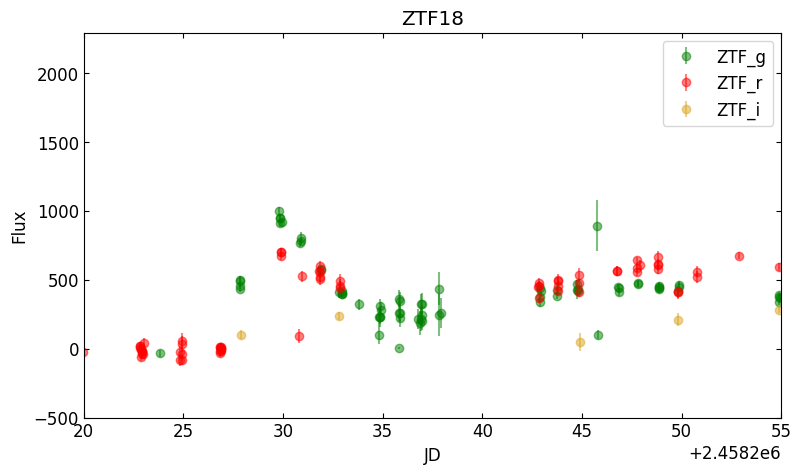

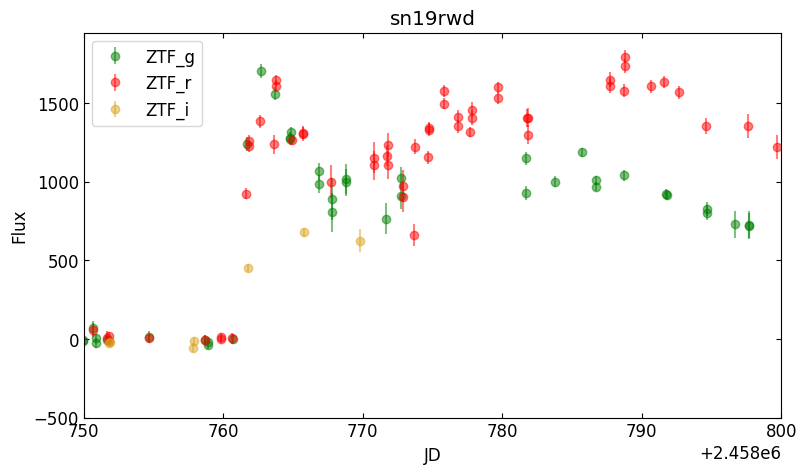

/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


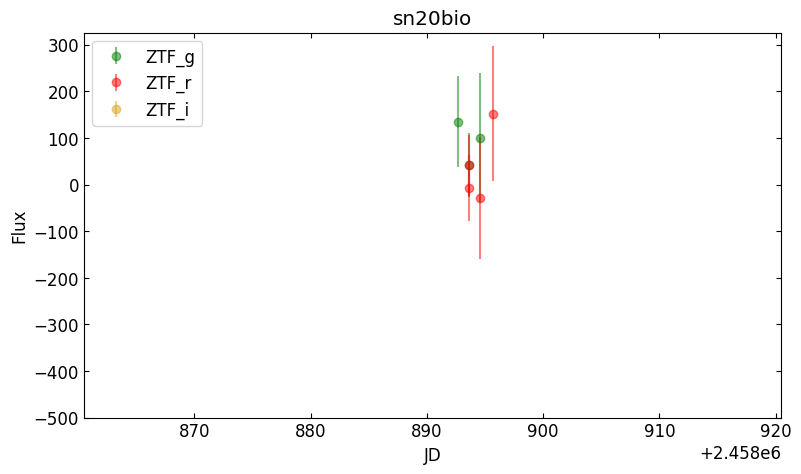

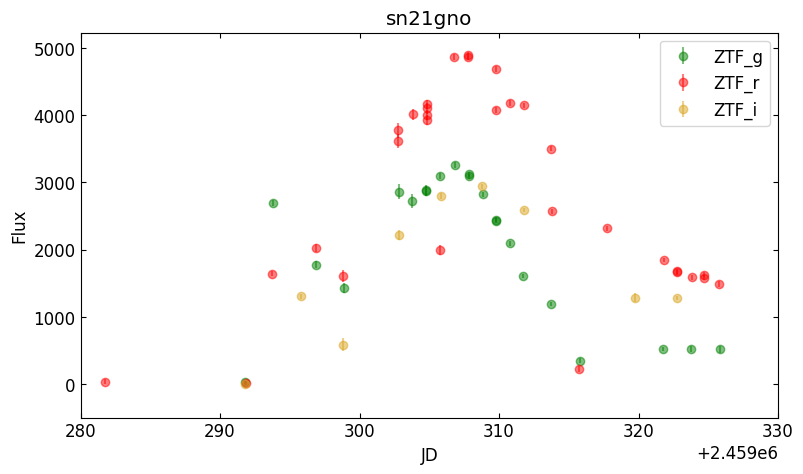

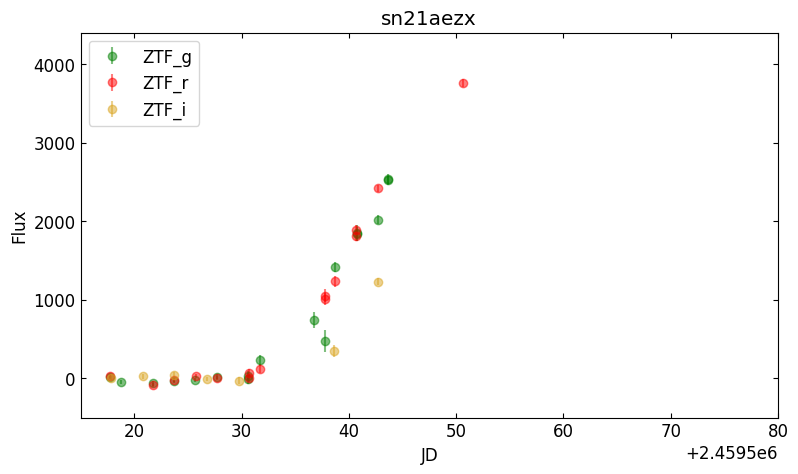

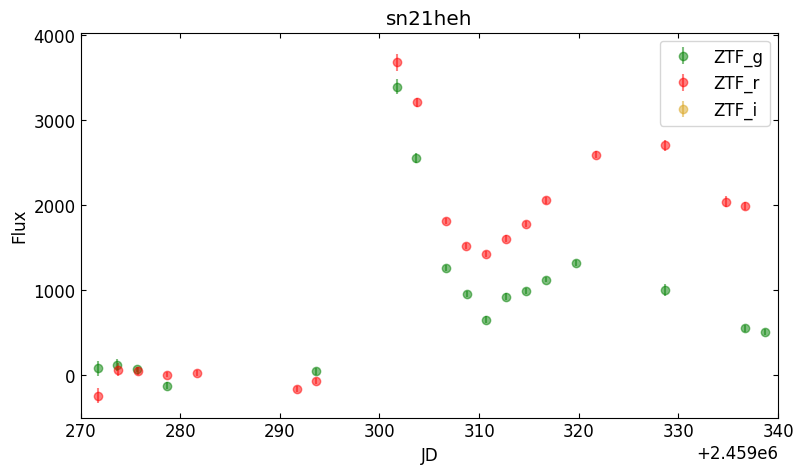

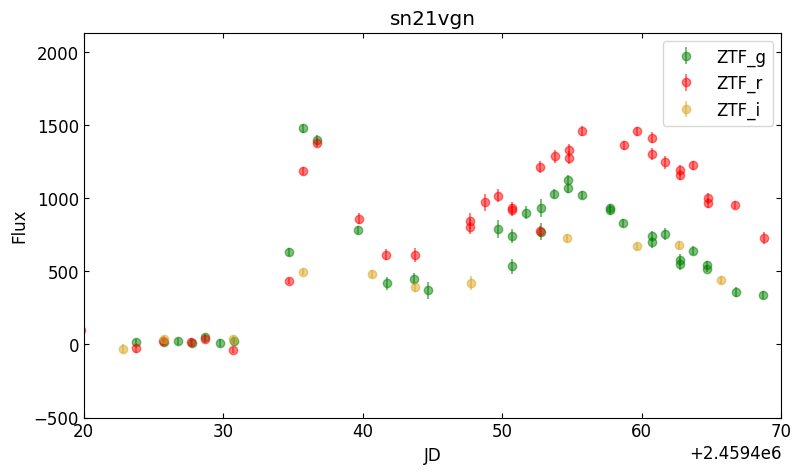

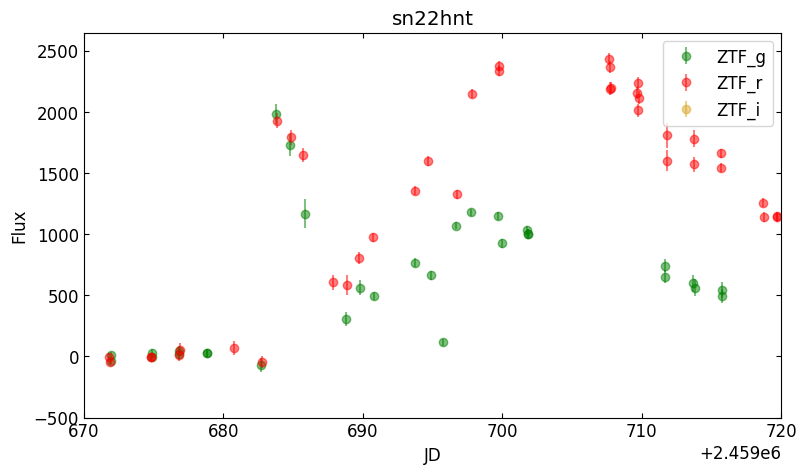

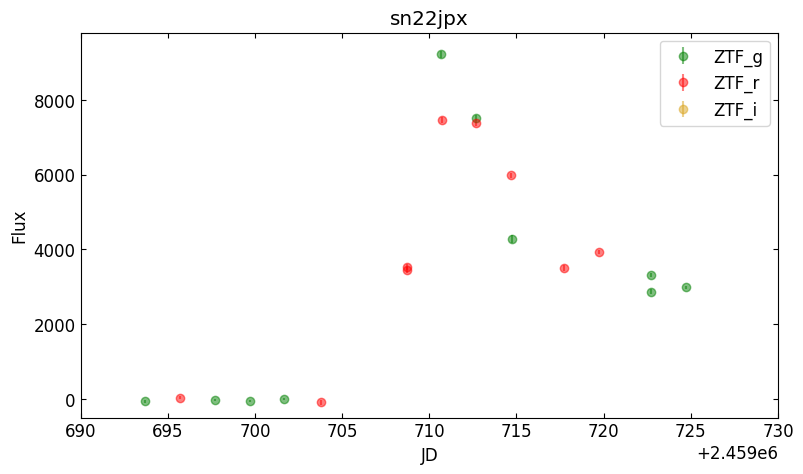

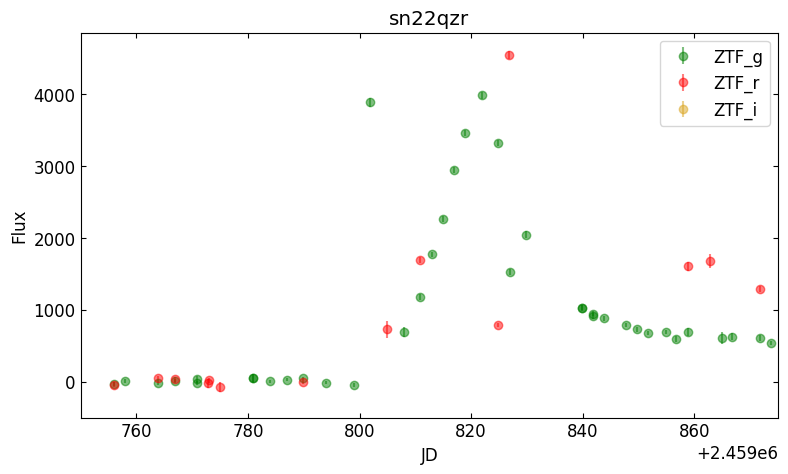

In [343]:
# PLOTTING THE FLUX
# %matplotlib qt
%matplotlib inline

#plotting the fluxes
plot_LC(snztf18, col1='forcediffimflux', err='forcediffimfluxunc',ID='ZTF18', xlimit=True, xlims=[20+2.4582e6, 55+2.4582e6])
plot_LC(sn19rwd, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn19rwd', xlimit=True, xlims=[750+2.458e6, 800+2.458e6])
plot_LC(sn20bio, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn20bio', xlimit=True, xlims=[2458860.5, 2458920.5])
plot_LC(sn21gno, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21gno', xlimit=True, xlims=[280+2.459e6, 330+2.459e6])
plot_LC(sn21aezx, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21aezx', xlimit=True, xlims=[15+2.4595e6, 80+2.4595e6])
plot_LC(sn21heh, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21heh', xlimit=True, xlims=[270+2.459e6, 340+2.459e6])
plot_LC(sn21vgn, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21vgn', xlimit=True, xlims=[20+2.4594e6,70+2.4594e6])
plot_LC(sn22hnt, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn22hnt', xlimit=True, xlims=[670+2.459e6, 720+2.459e6])
plot_LC(sn22jpx, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn22jpx', xlimit=True, xlims=[690+2.459e6, 730+2.459e6])
plot_LC(sn22qzr, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn22qzr', xlimit=True, xlims=[750+2.459e6, 875+2.459e6])

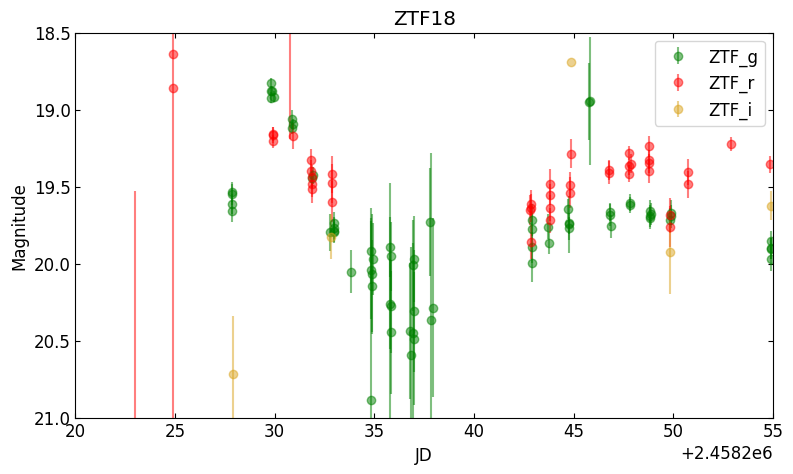

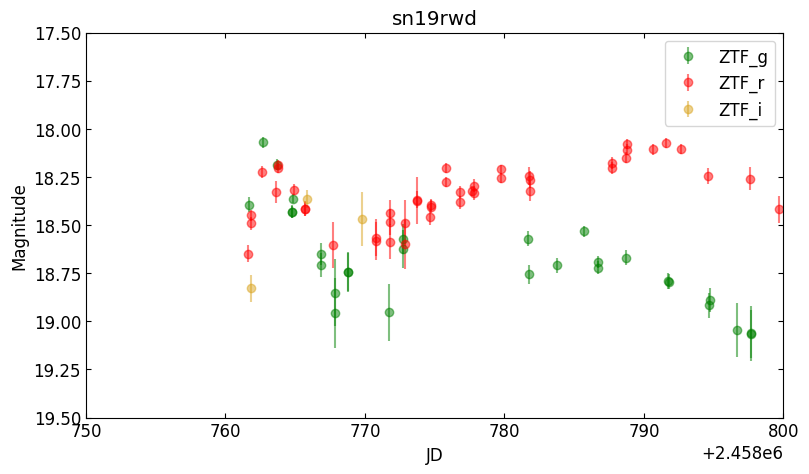

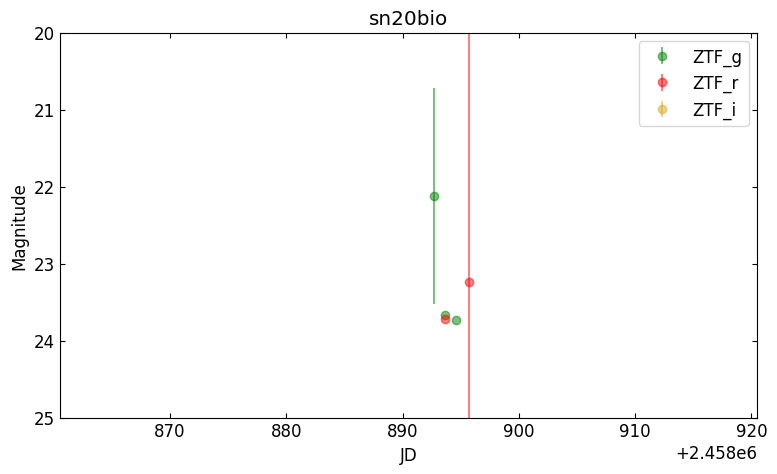

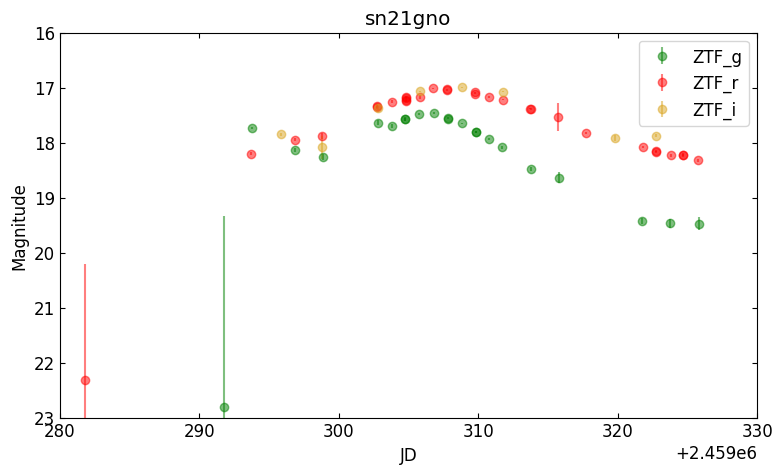

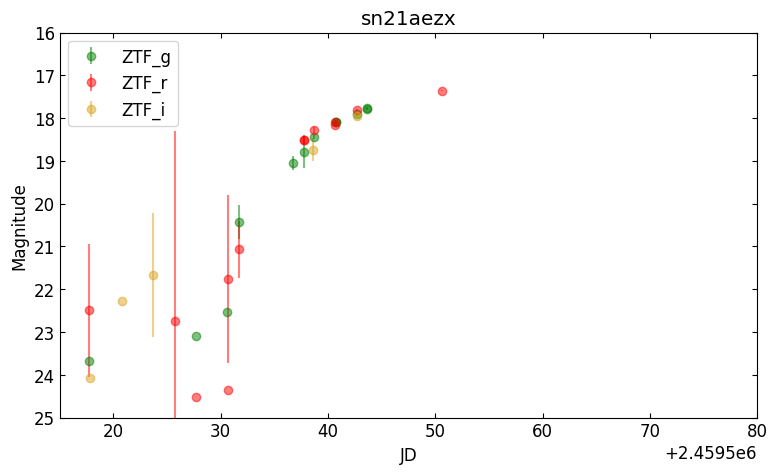

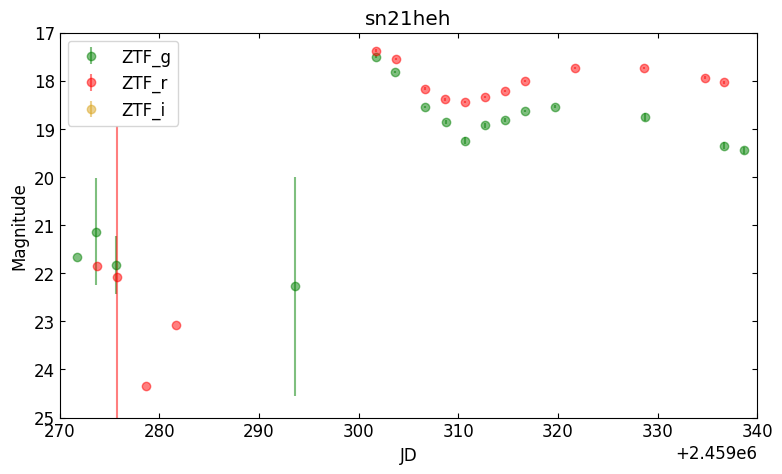

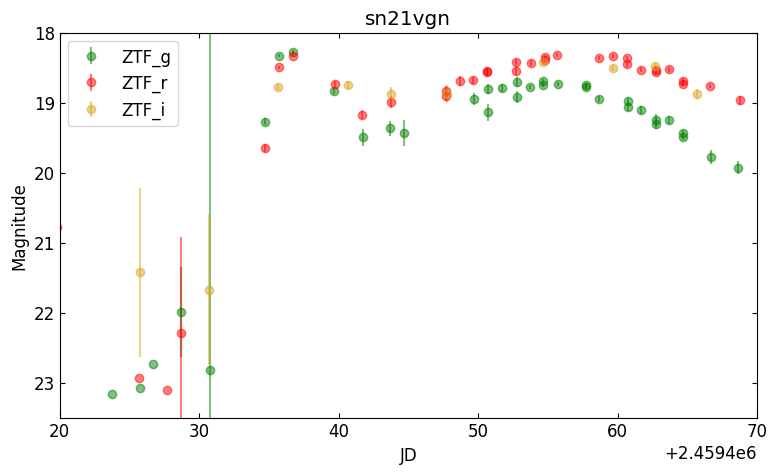

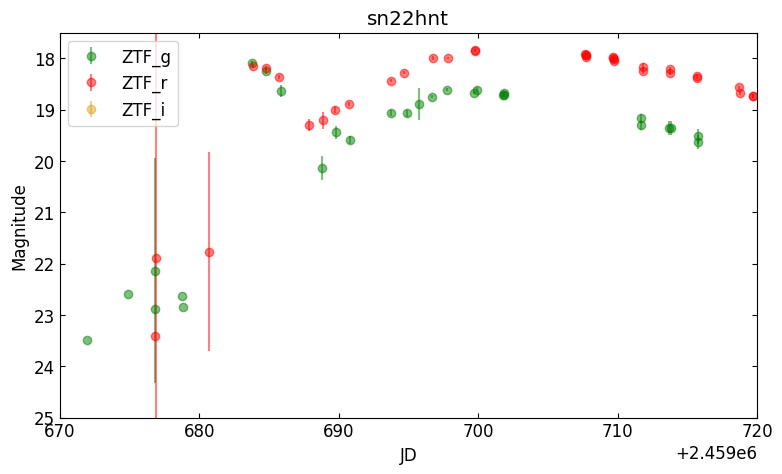

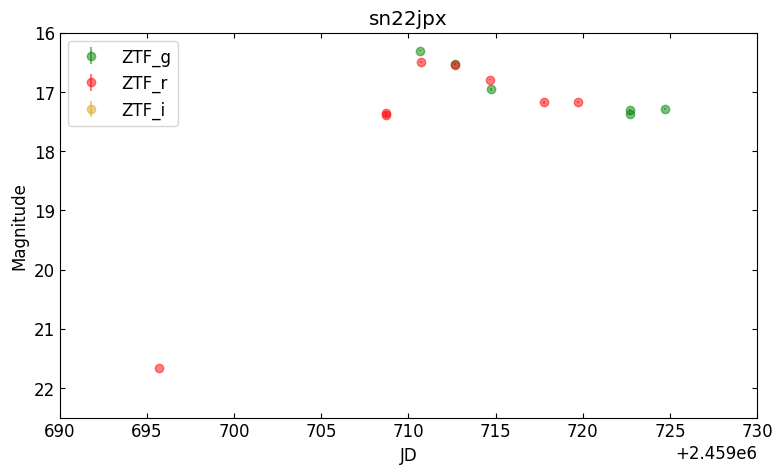

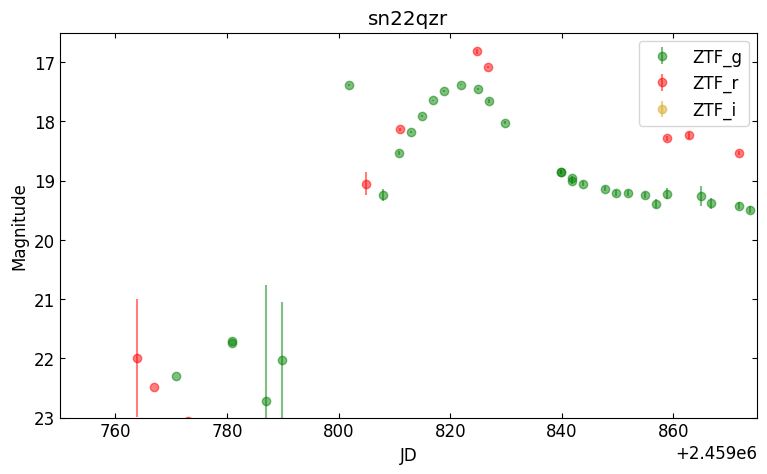

In [344]:
# PLOTTING THE MAG

# %matplotlib qt
%matplotlib inline

## plotting the magnitudes
plot_LC(snztf18, col1='mag', err=_, ID='ZTF18', xlimit=True, xlims=[20+2.4582e6, 55+2.4582e6], ylims=[21.0, 18.5], flux=False)
plot_LC(sn19rwd, col1='mag', err=_,ID='sn19rwd', xlimit=True, xlims=[750+2.458e6, 800+2.458e6], ylims=[19.5, 17.5], flux=False)
plot_LC(sn20bio, col1='mag', err=_,ID='sn20bio', xlimit=True, xlims=[2458860.5, 2458920.5], ylims=[25, 20], flux=False)
plot_LC(sn21gno, col1='mag', err=_, ID='sn21gno', xlimit=True, xlims=[280+2.459e6, 330+2.459e6], ylims=[23, 16], flux=False)
plot_LC(sn21aezx, col1='mag', err=_, ID='sn21aezx', xlimit=True, xlims=[15+2.4595e6, 80+2.4595e6], ylims=[25, 16], flux=False)
plot_LC(sn21heh, col1='mag', err=_, ID='sn21heh', xlimit=True, xlims=[270+2.459e6, 340+2.459e6], ylims=[25, 17], flux=False)
plot_LC(sn21vgn, col1='mag', err=_, ID='sn21vgn', xlimit=True, xlims=[20+2.4594e6,70+2.4594e6], ylims=[23.5, 18], flux=False)
plot_LC(sn22hnt, col1='mag', err=_, ID='sn22hnt', xlimit=True, xlims=[670+2.459e6, 720+2.459e6], ylims=[25, 17.5], flux=False)
plot_LC(sn22jpx, col1='mag', err=_, ID='sn22jpx', xlimit=True, xlims=[690+2.459e6, 730+2.459e6], ylims=[22.5, 16.0], flux=False)
plot_LC(sn22qzr, col1='mag', err=_, ID='sn22qzr', xlimit=True, xlims=[750+2.459e6, 875+2.459e6], ylims=[23.0, 16.5], flux=False)

In [345]:
# PLOTTING FP AND ALERT MAG DATA TOGETHER

def plot_combo_LC(fp_df, df, df_non, ID='SN ID', show=True, alert=True, xlims=[0,0], ylims=[0,0], save=True, new_fig=True):
    """
    """
    if new_fig:
        plt.figure(figsize=(7,5))
    plt.rcParams.update({'font.size': 12})

    # FP DATA
    #plot g band w/ err
    err_g = shape_err(fp_df, filter='ZTF_g')
    plt.errorbar(fp_df[fp_df['filter']=='ZTF_g'].jd-2400000.5, fp_df[fp_df['filter']=='ZTF_g']['mag'], err_g, 
                fmt='s',markerfacecolor='none', markeredgecolor='green', ecolor='green', label='FP_g', alpha=0.3)
    
    #plot r band w/ err
    err_r = shape_err(fp_df, filter='ZTF_r')
    plt.errorbar(fp_df[fp_df['filter']=='ZTF_r'].jd-2400000.5, fp_df[fp_df['filter']=='ZTF_r']['mag'], err_r, 
                fmt='s',markerfacecolor='none', markeredgecolor='red', ecolor='red', label='FP_r', alpha=0.3)

    #plot i band w/ err
    err_i = shape_err(fp_df, filter='ZTF_i')
    plt.errorbar(fp_df[fp_df['filter']=='ZTF_i'].jd-2400000.5, fp_df[fp_df['filter']=='ZTF_i']['mag'], err_i, 
                fmt='s',markerfacecolor='none', markeredgecolor='goldenrod', ecolor='goldenrod', label='FP_i', alpha=0.3)
    
    
    # ALERT DATA
    if alert:
        #plot g band w/ err
        # plt.scatter(df[df['fid']==1].mjd,df[df['fid']==1].magpsf, color='green', label='alert_g') #detections
        plt.errorbar(df[df['fid']==1].mjd,df[df['fid']==1].magpsf,df[df['fid']==1].sigmapsf, fmt='o', 
                    color='lime', ecolor='lime', label='alert_g', alpha=0.5)
        plt.scatter(np.array(df_non[df_non['fid']==1].mjd),np.array(df_non[df_non['fid']==1].diffmaglim), 
                    color='lime', label='non_g', marker='v', alpha=0.3)
        
        #plot r band w/ err
        # plt.scatter(df[df['fid']==2].mjd,df[df['fid']==2].magpsf, color='red', label='alert_r') #detections
        plt.errorbar(df[df['fid']==2].mjd,df[df['fid']==2].magpsf,df[df['fid']==2].sigmapsf, fmt='o', 
                    color='magenta', ecolor='magenta', label='alert_r', alpha=0.5)
        plt.scatter(np.array(df_non[df_non['fid']==2].mjd),np.array(df_non[df_non['fid']==2].diffmaglim), 
                    color='magenta', label='non_r', marker='v', alpha=0.3)

    if xlims != [0,0]:
        # print('here')
        plt.xlim(xlims[0], xlims[1])
    if ylims != [0,0]:
        plt.ylim(ylims[0], ylims[1])
    plt.title(ID)
    plt.xlabel('MJD')
    plt.ylabel('Magnitude')
    plt.legend(loc='lower right')
    # plt.gca().invert_yaxis()
    if save:
        plt.savefig('./figures/fp/'+ID+'_combo_fp_LC_mag.png')
    if show:
        plt.show()
    return

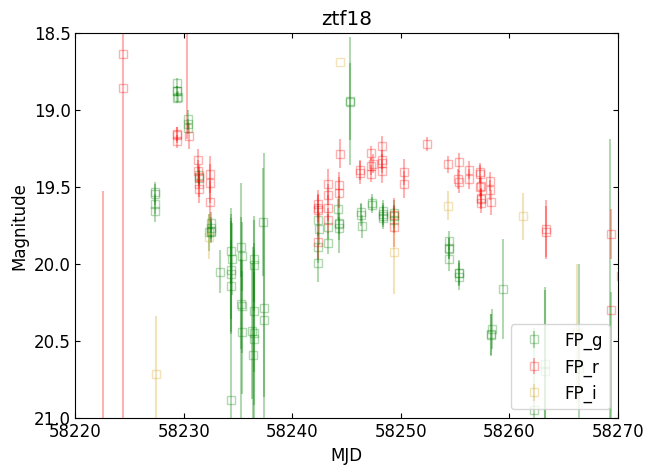

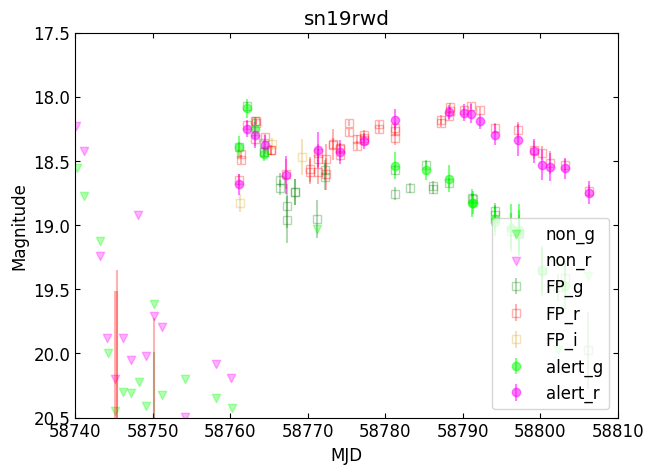

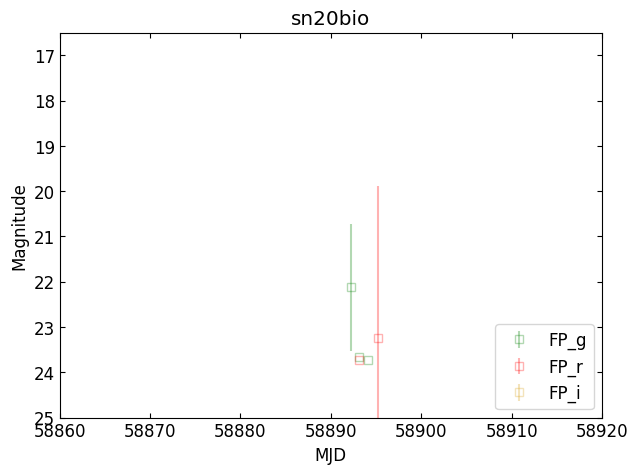

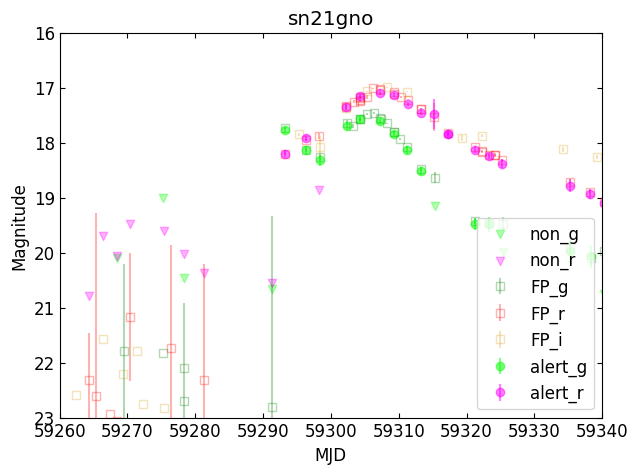

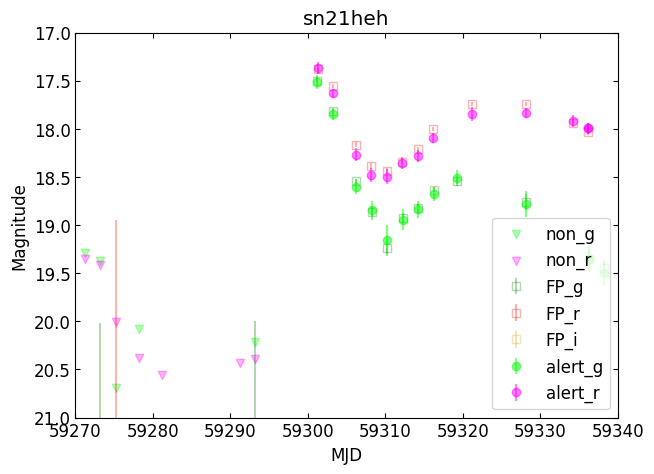

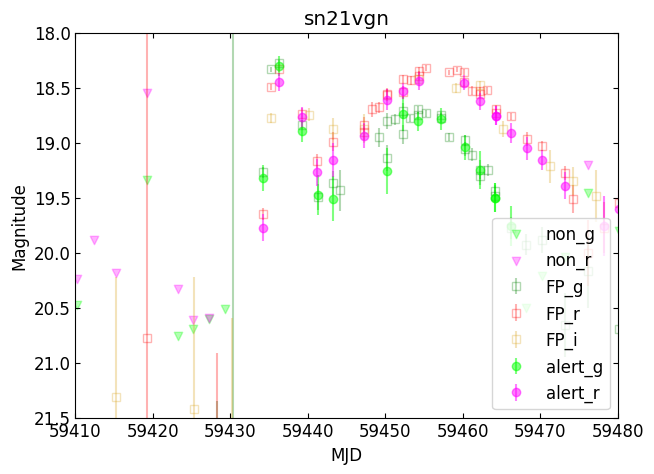

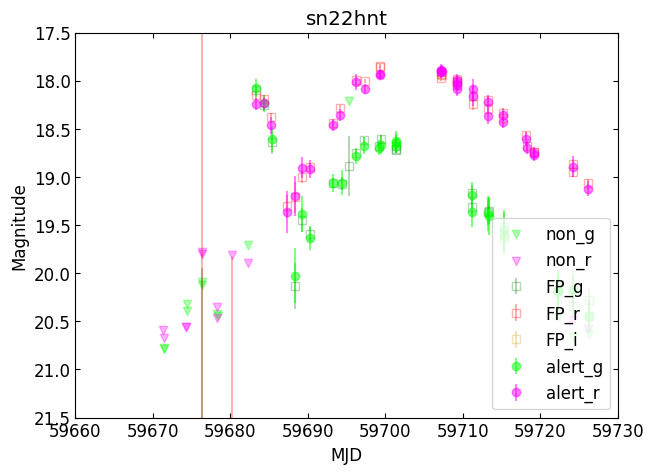

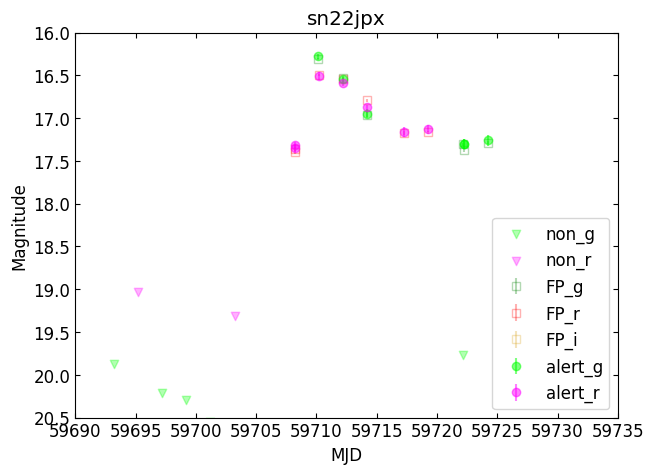

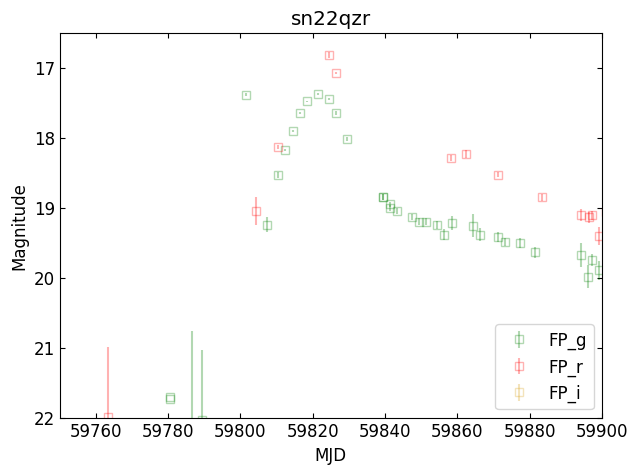

In [346]:
# PLOTTING FP AND ALERT DATA TOGETHER

%matplotlib inline
# %matplotlib qt

plot_combo_LC(snztf18, _, _, ID='ztf18', alert=False, xlims=[58220, 58270], ylims=[21.0, 18.5])
plot_combo_LC(sn19rwd, sn19rwd_a, sn19rwd_non, ID='sn19rwd', xlims=[58740, 58810], ylims=[20.5, 17.5])
plot_combo_LC(sn20bio, _, _, ID='sn20bio', alert=False, xlims=[58860, 58920], ylims=[25.0, 16.5])
plot_combo_LC(sn21gno, sn21gno_a, sn21gno_non, ID='sn21gno', xlims=[59260, 59340], ylims=[23, 16])
# too messy #plot_combo_LC(sn21aezx,  _, _, ID='sn21aezx', alert=False)#, xlims=[58220, 58270], ylims=[21.0, 18.5])
plot_combo_LC(sn21heh, sn21heh_a, sn21heh_non, ID='sn21heh', xlims=[59270, 59340], ylims=[21, 17])
plot_combo_LC(sn21vgn, sn21vgn_a, sn21vgn_non, ID='sn21vgn', xlims=[59410, 59480], ylims=[21.5, 18])
plot_combo_LC(sn22hnt, sn22hnt_a, sn22hnt_non, ID='sn22hnt', xlims=[59660, 59730], ylims=[21.5, 17.5])
plot_combo_LC(sn22jpx, sn22jpx_a, sn22jpx_non, ID='sn22jpx', xlims=[59690, 59735], ylims=[20.5, 16.0])
plot_combo_LC(sn22qzr, _, _, ID='sn22qzr', alert=False, xlims=[59750, 59900], ylims=[22.0, 16.5])


In [347]:
def side_by_side(fp, ald, nond, ID='temp', alert=True, xlims_mjd=[0,0], xlims_jd=[0,0], ylims=[0,0], save=True):
    plt.figure(figsize=(12,8))

    plt.subplot(2, 1, 1)
    #combined, t=[mjd]
    plot_combo_LC(fp, ald, nond, ID=ID, alert=alert, xlims=[xlims_mjd[0], xlims_mjd[1]], ylims=[ylims[0], ylims[1]], new_fig=False, show=False, save=False)
        

    plt.subplot(2, 2, 3)
    #flux, t=[jd]
    plot_LC(fp, col1='forcediffimflux', err='forcediffimfluxunc',ID=ID, xlimit=True, xlims=[xlims_jd[0], xlims_jd[1]], new_fig=False, save=False, show=False)
    plt.ylabel('Flux')
    plt.title(None)


    plt.subplot(2, 2, 4)
    #magnitude, t=[jd]
    plot_LC(fp, col1='mag', err=_, ID=ID, xlimit=True, xlims=[xlims_jd[0], xlims_jd[1]], ylims=[ylims[0], ylims[1]], flux=False, new_fig=False, save=False, show=False)
    plt.ylabel('Mag')
    plt.title(None)

    plt.tight_layout()
    if save:
        plt.savefig('./figures/fp/'+ID+'_sidebysidebyside.png')

In [348]:
#fp_list = [snztf18, sn19rwd, sn20bio, sn21aezx, sn21gno, sn21heh, sn21vgn, sn22hnt, sn22jpx, sn22qzr]
al_list = [_, sn19rwd_a, _, _, sn21gno_a, sn21heh_a, sn21vgn_a, sn22hnt_a, sn22jpx_a, _]
nd_list = [_, sn19rwd_non, _, _, sn21gno_non, sn21heh_non, sn21vgn_non, sn22hnt_non, sn22jpx_non, _]
alert_bools = [False, True, False, False, True, True, True, True, True, False]
ID_list = ['snztf18', 'sn19rwd', 'sn20bio', 'sn21aezx', 'sn21gno', 
           'sn21heh', 'sn21vgn', 'sn22hnt', 'sn22jpx', 'sn22qzr']
xlims_mjd_ls = [[58220, 58270], [58740, 58810], [58860, 58920], [59514.5, 59569.5], [59279.5, 59319.5], 
                [59270, 59340], [59410, 59480], [59660, 59730], [59690, 59735], [59750, 59900]]
xlims_jd_ls = [[20+2.4582e6, 55+2.4582e6], [750+2.458e6, 800+2.458e6], [2458860.5, 2458920.5], [15+2.4595e6, 70+2.4595e6], [280+2.459e6, 320+2.459e6], 
               [2459270.5, 2459340.5], [2459410.5, 2459480.5], [2459660.5, 2459730.5], [2459700.5, 2459740.5], [750+2.459e6, 875+2.459e6]]
ylims_ls = [[21.0, 18.5], [20.5, 17.5], [27.5, 12.5], [23, 16], [24,16], 
            [21, 17], [21.5, 18], [21.5, 17.5], [19.0, 16.0], [22.0, 16.0]]

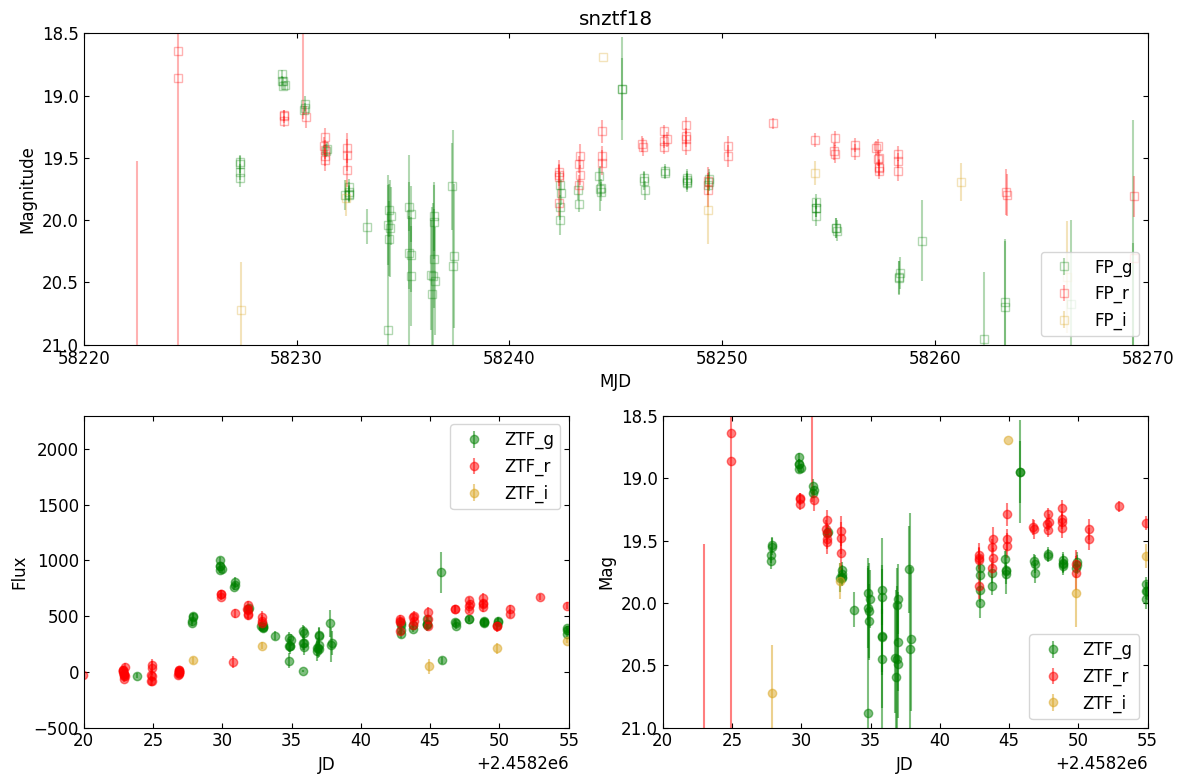

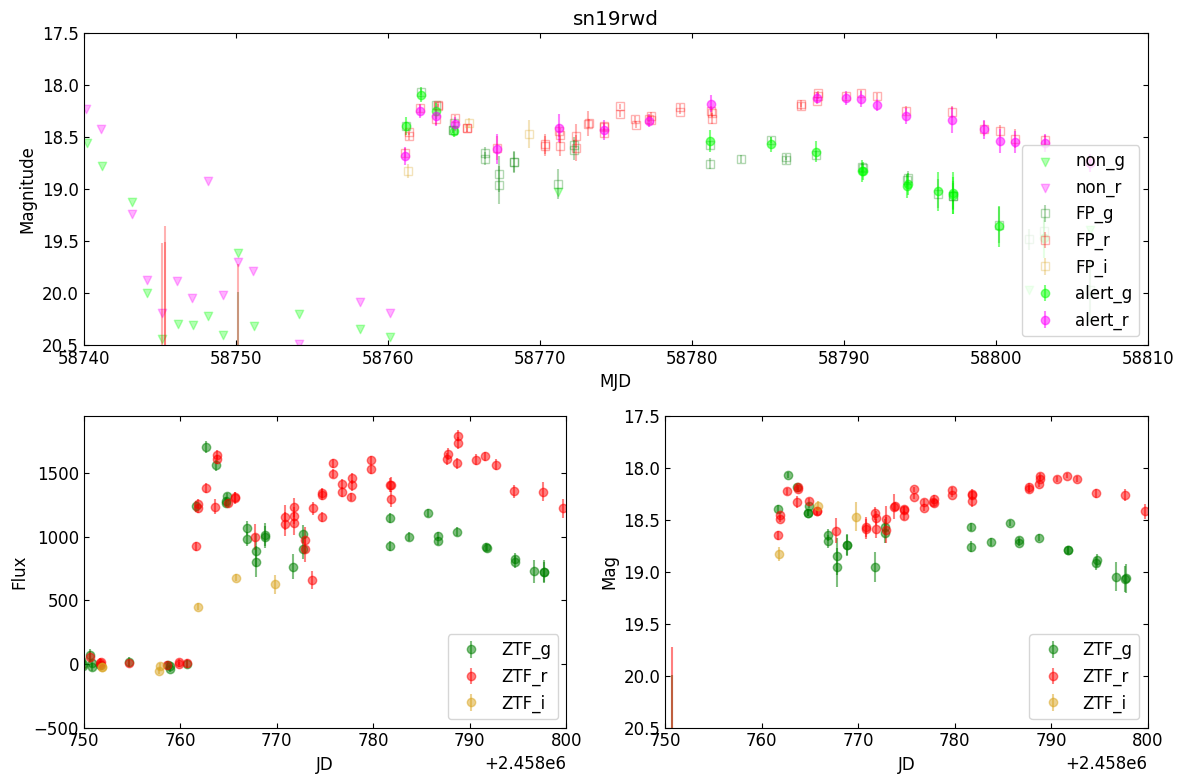

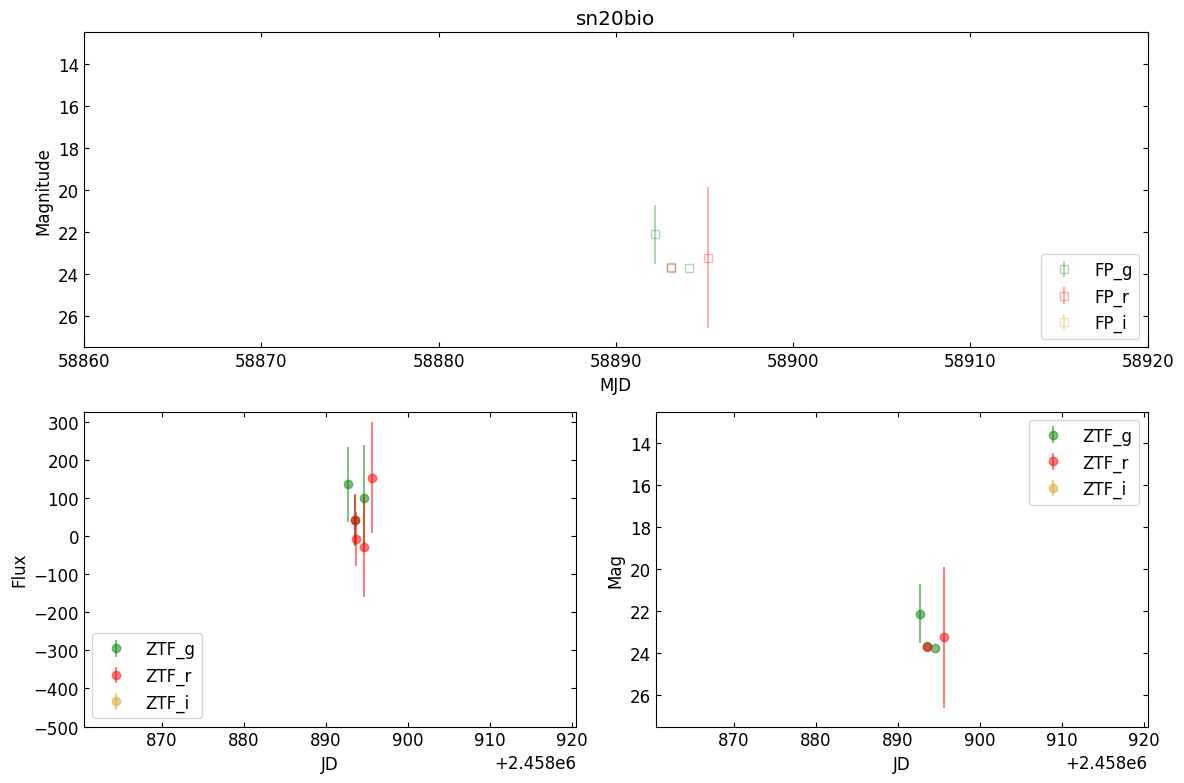

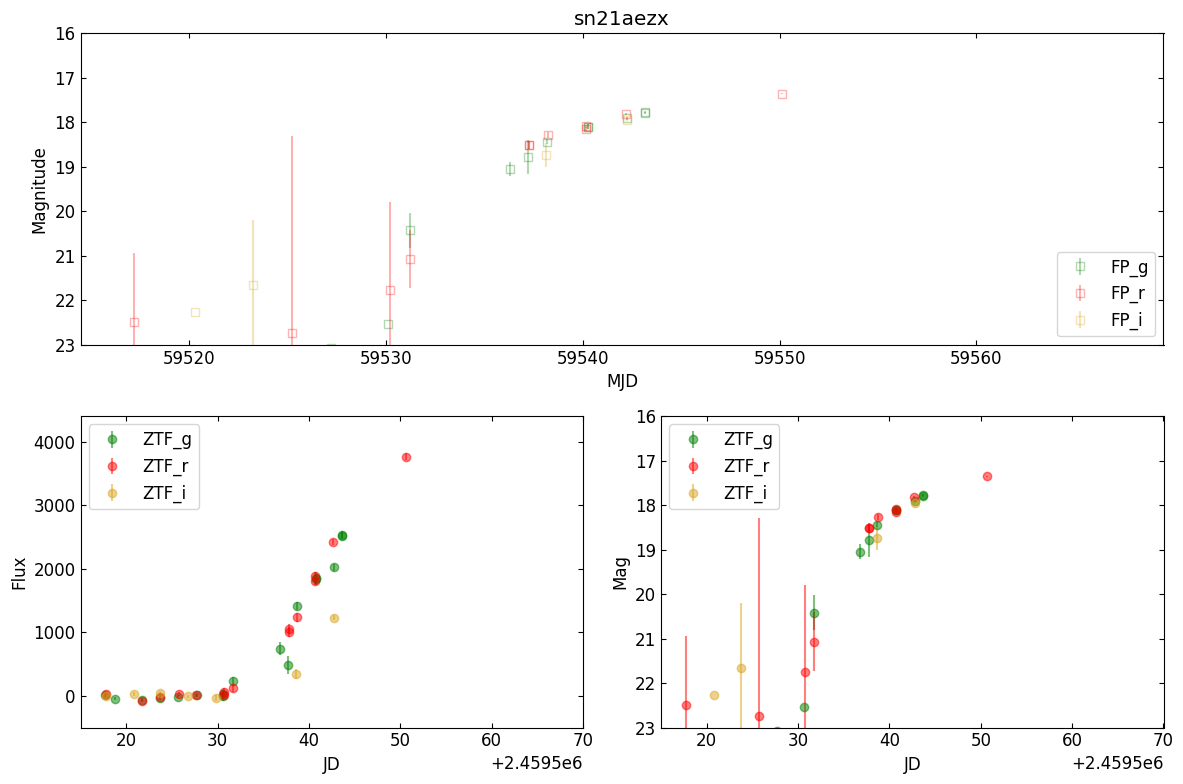

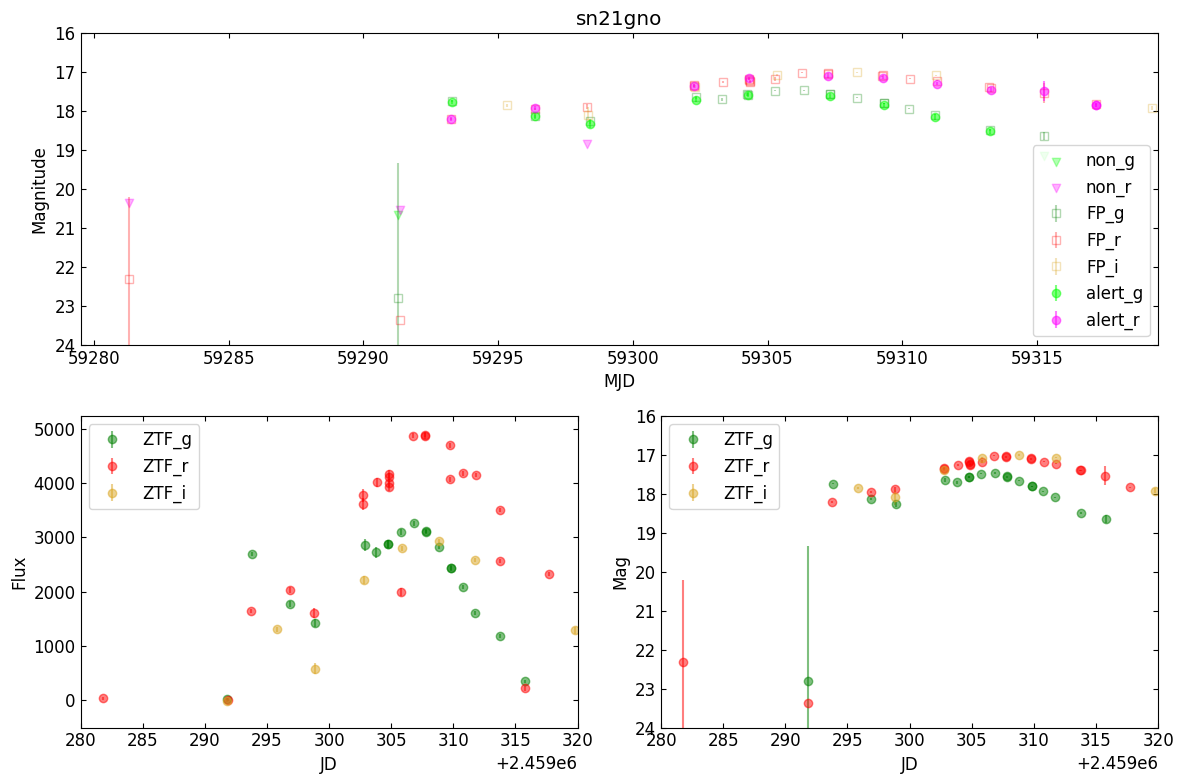

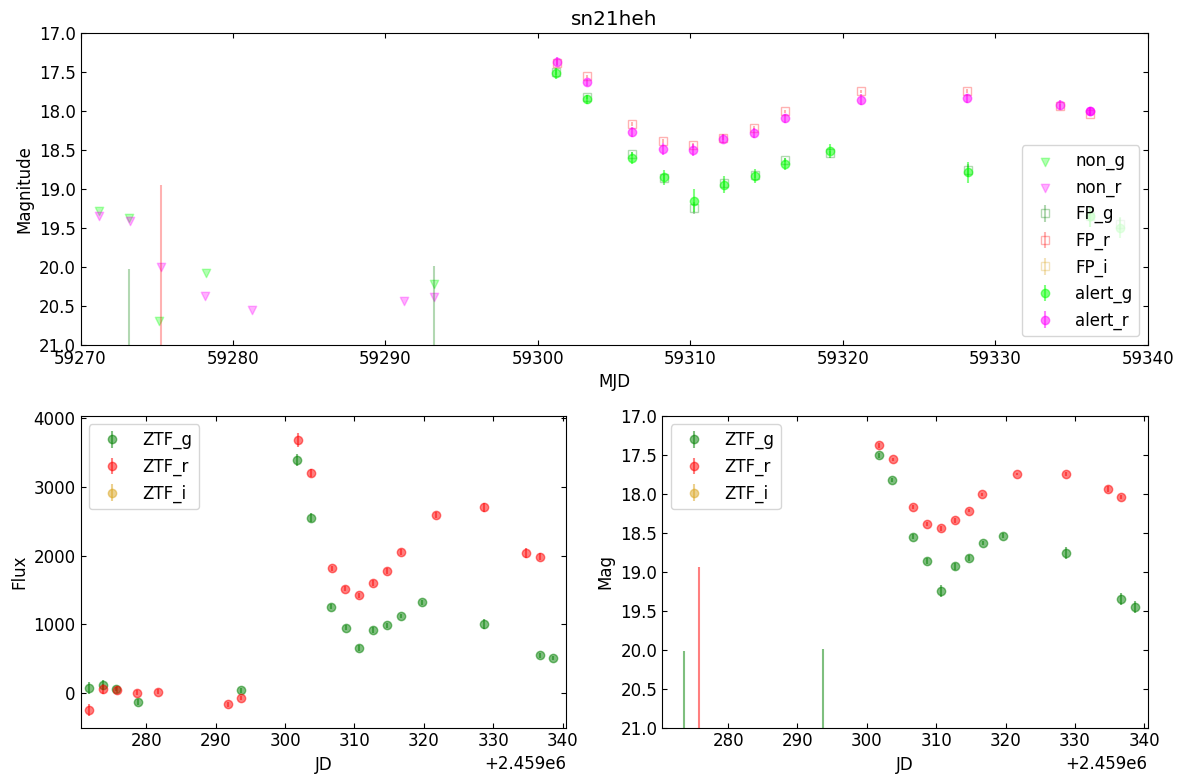

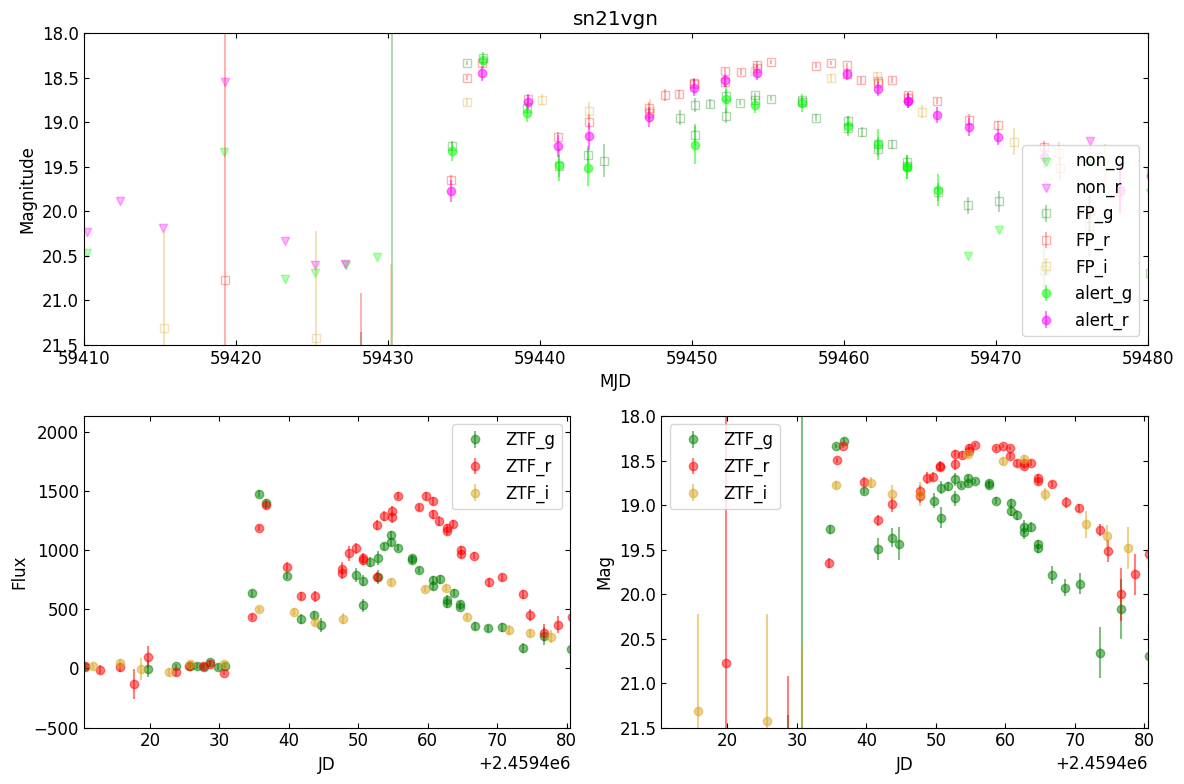

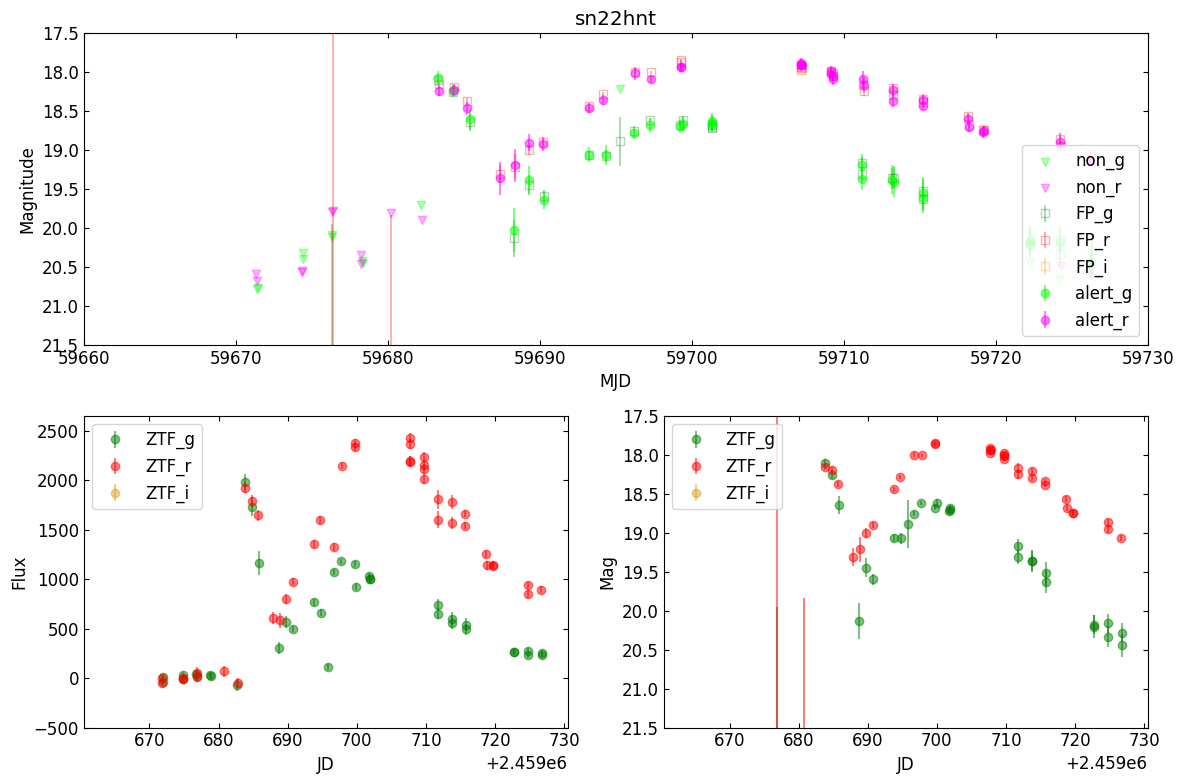

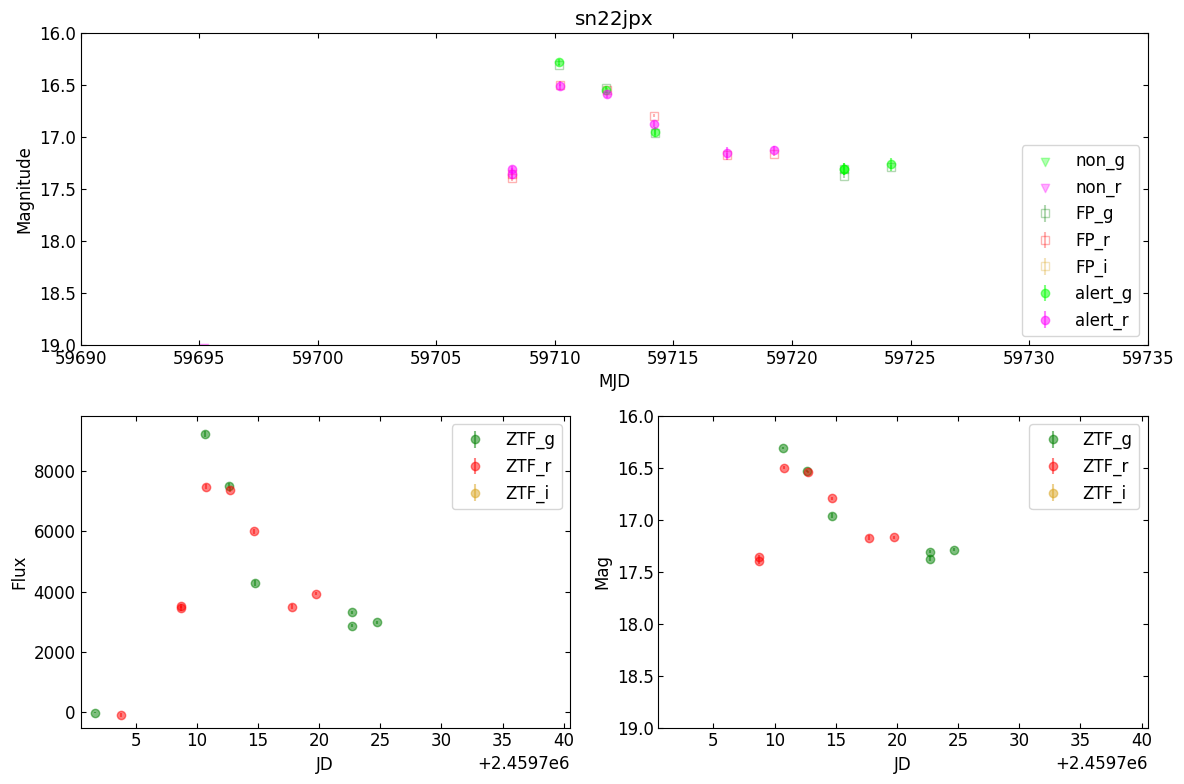

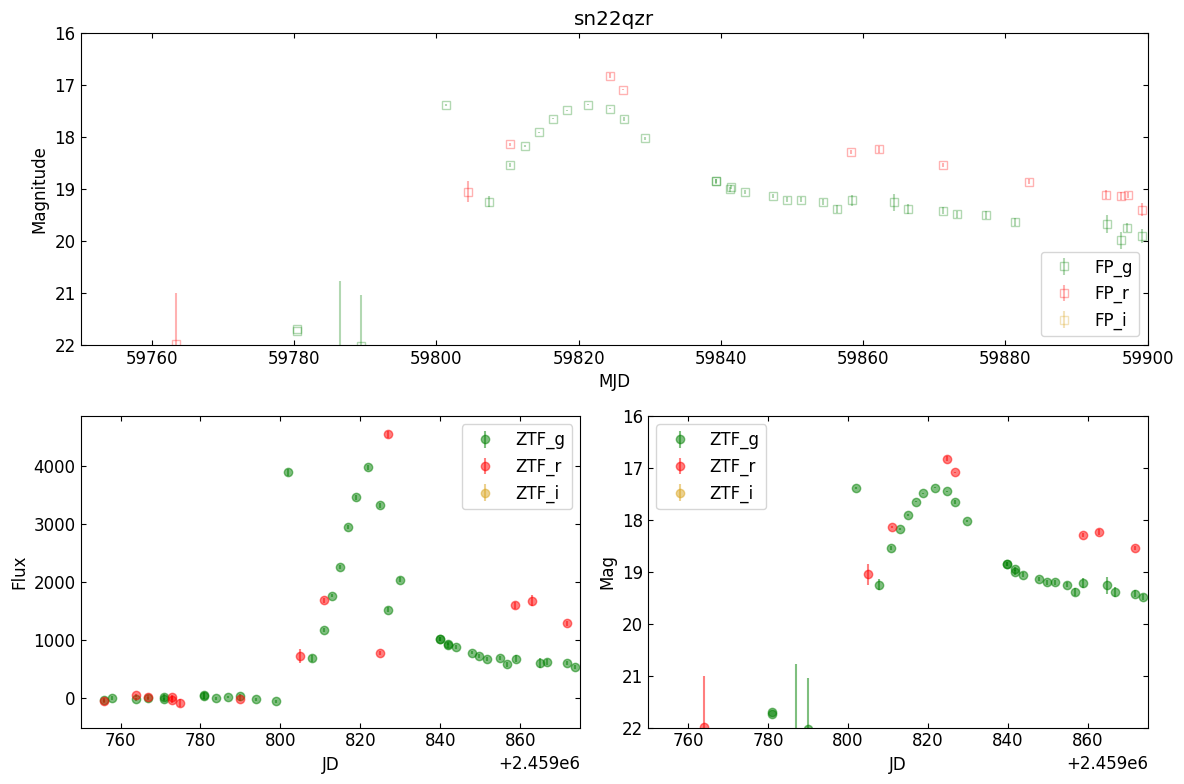

In [349]:
for i in range(len(fp_list)):
    side_by_side(fp_list[i], al_list[i], nd_list[i], ID=ID_list[i], alert=alert_bools[i], xlims_mjd=xlims_mjd_ls[i], xlims_jd=xlims_jd_ls[i], ylims=ylims_ls[i], save=True)

In [422]:
def multi_band_plot(ztf_df, asassn_df, atlas_df, ID='temp', ztf=True, asassn=True, atlas=True, xlims=[0,0], ylims=[0,0]):
    plt.figure(figsize=(8,6))
    if ztf:
        err_g = shape_err(ztf_df, filter='ZTF_g')
        err_r = shape_err(ztf_df, filter='ZTF_r')
        err_i = shape_err(ztf_df, filter='ZTF_i')
        
        plt.errorbar(ztf_df[ztf_df['filter']=='ZTF_g']['jd'], ztf_df[ztf_df['filter']=='ZTF_g']['mag'], err_g,
                     color='green', alpha=0.3, label='ZTF_g', linestyle='', marker='o')
        plt.errorbar(ztf_df[ztf_df['filter']=='ZTF_r']['jd'], ztf_df[ztf_df['filter']=='ZTF_r']['mag'], err_r,
                    color='red', alpha=0.3, label='ZTF_r', linestyle='', marker='o')
        plt.errorbar(ztf_df[ztf_df['filter']=='ZTF_i']['jd'], ztf_df[ztf_df['filter']=='ZTF_i']['mag'], err_i,
                    color='goldenrod', alpha=0.3, label='ZTF_i', linestyle='', marker='o')

    if asassn: #if want only good data then add in: [asassn_df['mag_err']!=99.99]
        if (asassn_df['Filter'].unique())[0] or (asassn_df['Filter'].unique())[1] == 'V':
            plt.errorbar(asassn_df[asassn_df['Filter']=='V']['HJD'], 
                        asassn_df[asassn_df['Filter']=='V']['mag'], 
                        asassn_df[asassn_df['Filter']=='V']['mag_err'], 
                        linestyle='', alpha=0.1, marker='d', color='darkkhaki', label='ASASSN V',zorder=50)
        if (asassn_df['Filter'].unique())[0] or (asassn_df['Filter'].unique())[1] == 'g':
            plt.errorbar(asassn_df[asassn_df['Filter']=='g']['HJD'], 
                        asassn_df[asassn_df['Filter']=='g']['mag'], 
                        asassn_df[asassn_df['Filter']=='g']['mag_err'], 
                        linestyle='', alpha=0.1, marker='d', color='limegreen',label='ASASSN g',zorder=50)
    if atlas:
        plt.errorbar(atlas_df[atlas_df['F']=='o']['MJD']+2400000.5, atlas_df[atlas_df['F']=='o']['m'], atlas_df[atlas_df['F']=='o']['dm'],
                    marker='s', color='orange', alpha=0.3, label='ATLAS o', linestyle='')
        plt.errorbar(atlas_df[atlas_df['F']=='c']['MJD']+2400000.5, atlas_df[atlas_df['F']=='c']['m'], atlas_df[atlas_df['F']=='c']['dm'],
                    marker='s', color='cyan', alpha=0.3, label='ATLAS c', linestyle='')
    
    # plt.gca().invert_yaxis()
    if xlims != [0,0]:
        plt.xlim(xlims[0], xlims[1])
    if ylims != [0,0]:
        plt.ylim(ylims[0], ylims[1])
    plt.ylabel('Apparent Magnitude')
    plt.xlabel('JD')
    plt.legend(loc='lower right')
    plt.title(ID+'-multiband')
    plt.savefig('./figures/fp/'+ID+'_multiband.png')

In [402]:
#xlims_jd_ls, ylims_ls, fp_list, ID_list
at_list = [snztf18_at, sn19rwd_at, sn20bio_at, sn21aezx_at, sn21gno_at, sn21heh_at, sn21vgn_at, sn22hnt_at, sn22jpx_at, sn22qzr_at]
as_list = [snztf18_as, sn19rwd_as, sn20bio_as, sn21aezx_as, sn21gno_as, sn21heh_as, sn21vgn_as, sn22hnt_as, sn22jpx_as, sn22qzr_as]

In [403]:
#asassn csv files have > before upper limit magnitude detections, 
#so i am removing them here which rewrites the df memory 
for i,df in enumerate(as_list):
    df['mag'] = df['mag'].loc[df['mag'].str[0]=='>'].str[1:].astype('float')


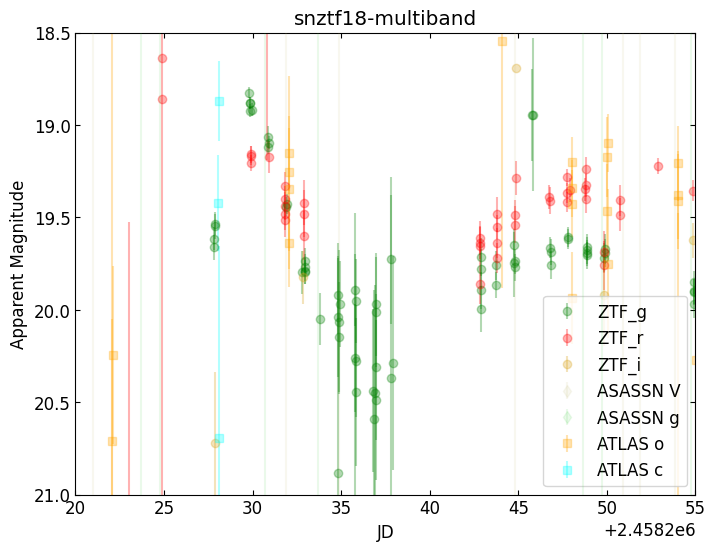

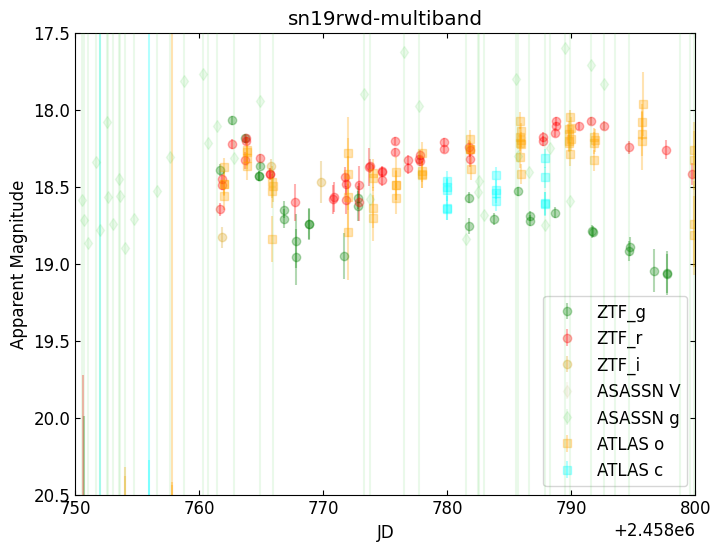

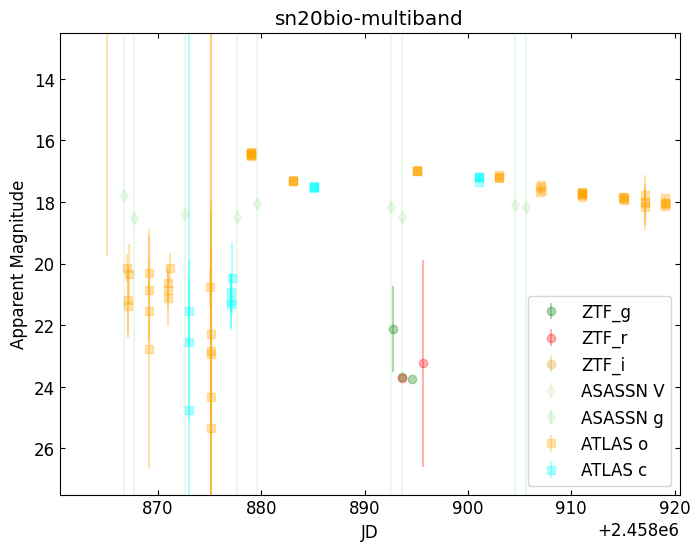

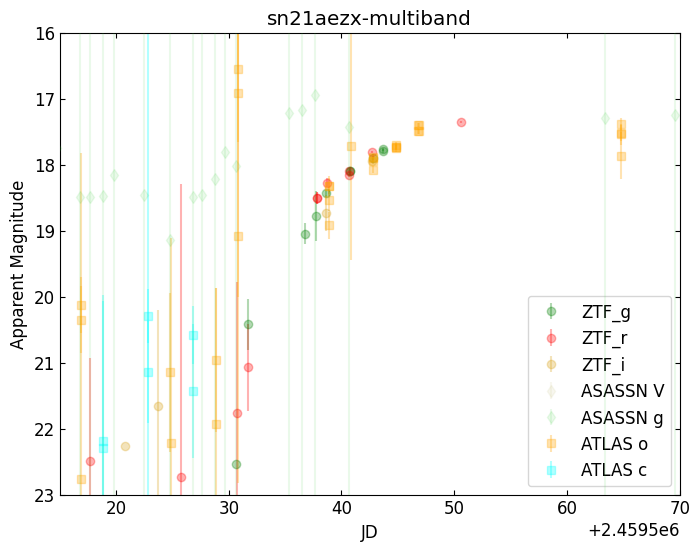

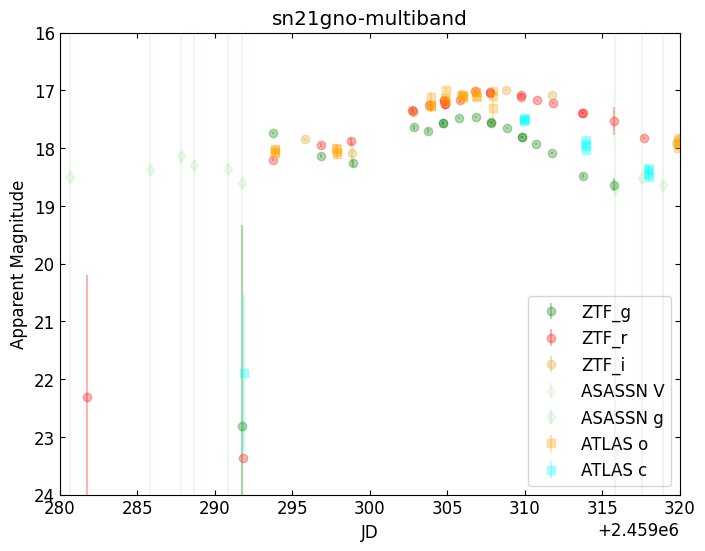

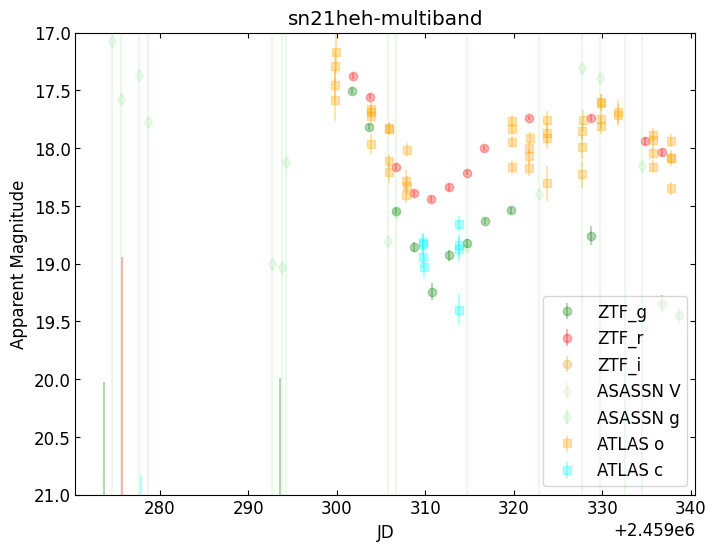

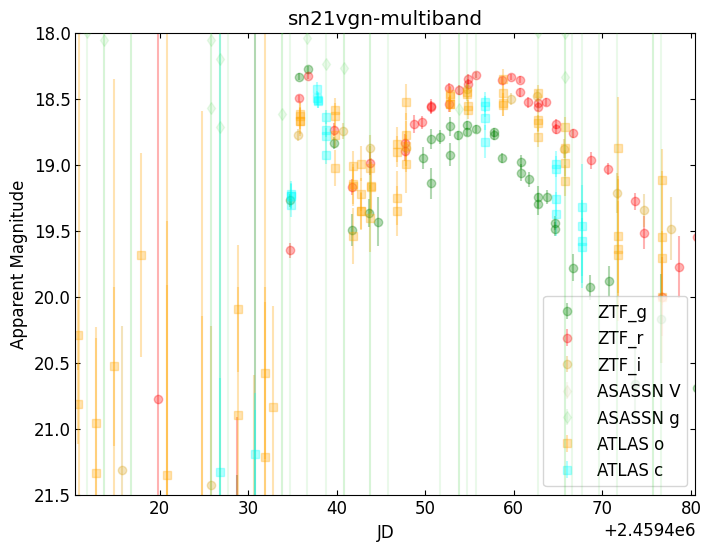

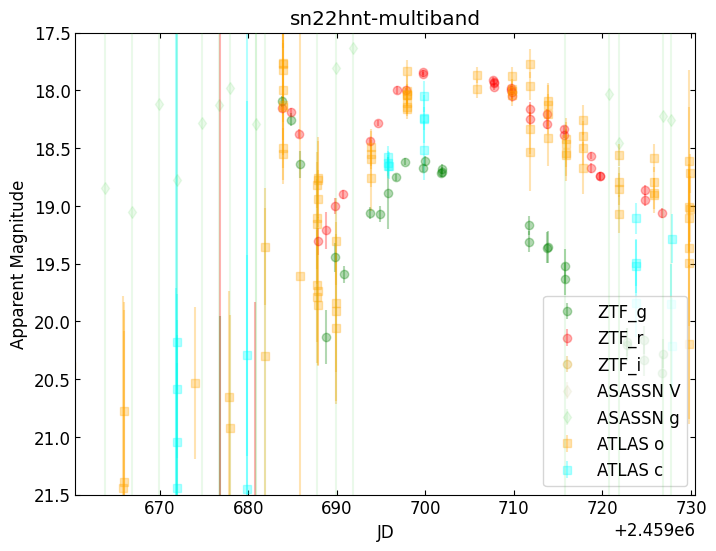

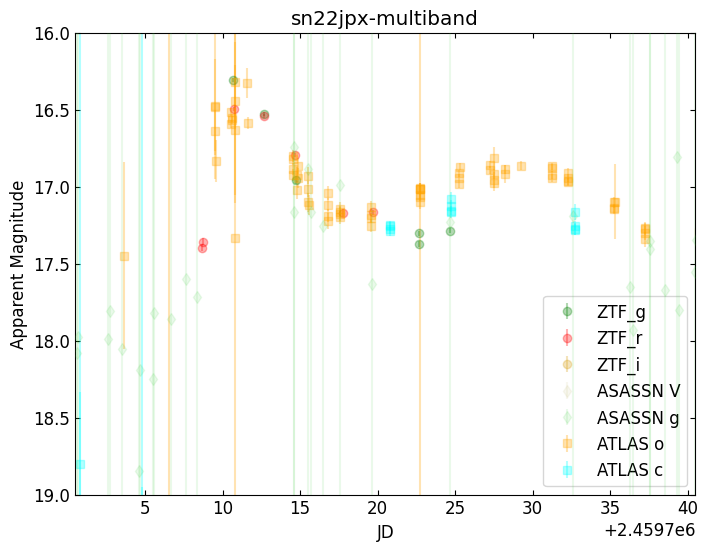

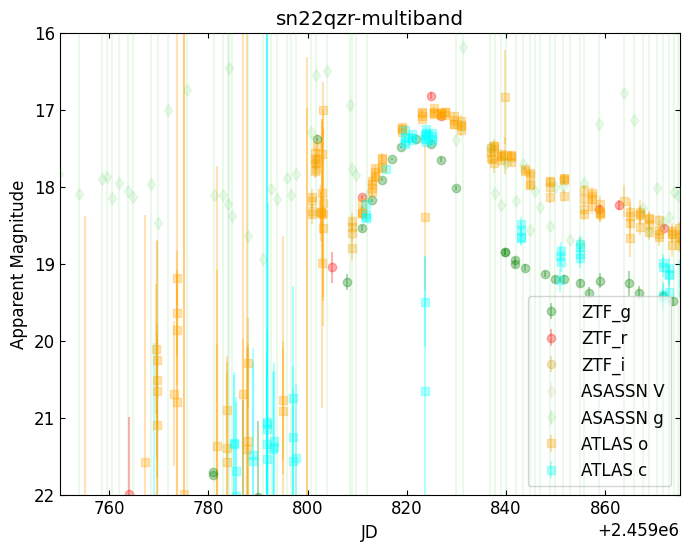

In [423]:
%matplotlib inline
# %matplotlib qt
for i in range(len(fp_list)):
    multi_band_plot(fp_list[i], as_list[i], at_list[i], ID=ID_list[i], xlims=xlims_jd_ls[i], ylims=ylims_ls[i])